In [1]:
import sys
sys.path.append(".")
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers,  models
import cv2
from model import model
from model import dpre
import matplotlib.pyplot as plt

## Data Preprocesing

In [4]:
df = pd.read_csv('Data_Folder/train_tp.csv')
fp = pd.read_csv('Data_Folder/train_fp.csv')
species = 11

In [5]:
X_Train, X_Test, Y_Train, Y_Test, class_weight = dpre.prepros.data_cleaning(df,fp,species,cv2)
cl_X_Train, cl_X_Test = dpre.prepros.cl_c(X_Train), dpre.prepros.cl_c(X_Test)

## Lenet 5

In [6]:
Le5model = model.cnn_mel.Lenet5()

In [7]:
%%time
Le5model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy','Precision',tf.keras.metrics.Recall()])
Lehist = Le5model.fit(X_Train, Y_Train, epochs=40,class_weight=class_weight,validation_data=(X_Test, Y_Test), batch_size=20)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/40
14/14 [==============================] - 13s 890ms/step - loss: 1.3594 - accuracy: 0.5018 - precision: 0.1830 - recall: 0.7179 - val_loss: 0.4321 - val_accuracy: 0.8382 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/40
14/14 [==============================] - 11s 815ms/step - loss: 0.7450 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6801 - val_accuracy: 0.8088 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/40
14/14 [==============================] - 12s 883ms/step - loss: 0.6885 - accuracy: 0.3370 - precision: 0.1378 - recall: 0.6923 - val_loss: 0.7086 - val_accuracy: 0.1618 - val_precision: 0.1618 - val_recall: 1.0000
Epoch 4/40
14/14 [==============================] - 12s 828ms/step - loss: 0.6921 - accuracy: 0.7179 - precision: 0.0250 - recall: 0.0256 - val_loss: 0.6600 - val_

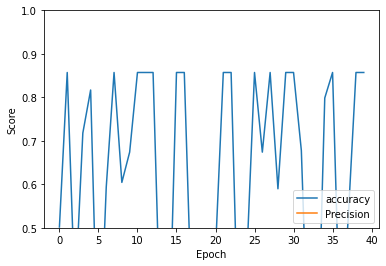

In [8]:
# summarize history for accuracy
plt.plot(Lehist.history['accuracy'], label='accuracy')
plt.plot(Lehist.history['precision'], label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

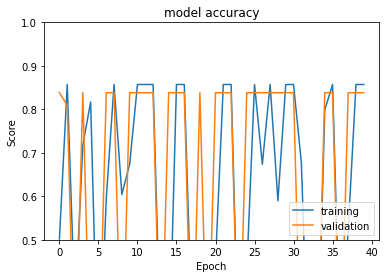

In [9]:
# summarize history for accuracy
plt.plot(Lehist.history['accuracy'], label='training')
plt.plot(Lehist.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

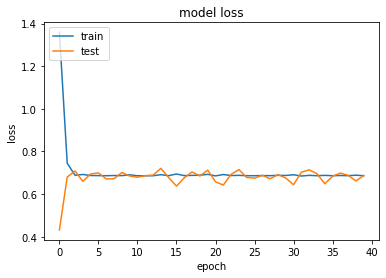

In [10]:
# summarize history for loss
plt.plot(Lehist.history['loss'],label='training')
plt.plot(Lehist.history['val_loss'], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
Le5model.evaluate(X_Test, Y_Test)

3/3 [==============================] - 1s 137ms/step - loss: 0.6875 - accuracy: 0.8382 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.6874511241912842, 0.8382353186607361, 0.0, 0.0]

## ALEXNET

In [12]:
Alexmodel = model.cnn_mel.Alexnet()

In [13]:
%%time
Alexmodel.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy','Precision',tf.keras.metrics.Recall()])
Alexhist = Alexmodel.fit(X_Train, Y_Train, epochs=40,class_weight=class_weight,validation_data=(X_Test, Y_Test), batch_size=20)

Epoch 1/40
14/14 [==============================] - 5s 289ms/step - loss: 0.7176 - accuracy: 0.5531 - precision: 0.1880 - recall_1: 0.6410 - val_loss: 0.5221 - val_accuracy: 0.8382 - val_precision: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/40
14/14 [==============================] - 4s 252ms/step - loss: 0.7174 - accuracy: 0.8571 - precision: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6784 - val_accuracy: 0.8382 - val_precision: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/40
14/14 [==============================] - 4s 257ms/step - loss: 0.6871 - accuracy: 0.3297 - precision: 0.1327 - recall_1: 0.6667 - val_loss: 0.7054 - val_accuracy: 0.1618 - val_precision: 0.1618 - val_recall_1: 1.0000
Epoch 4/40
14/14 [==============================] - 4s 257ms/step - loss: 0.6870 - accuracy: 0.2344 - precision: 0.1336 - recall_1: 0.7949 - val_loss: 0.6897 - val_accuracy: 0.8382 - val_precision: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/40
14/14 [==============================] - 4s 2

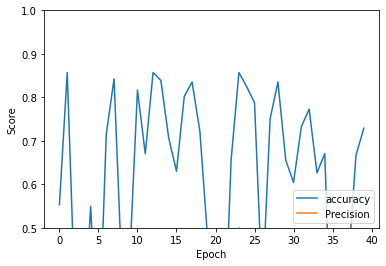

In [14]:
# summarize history for accuracy
plt.plot(Alexhist.history['accuracy'], label='accuracy')
plt.plot(Alexhist.history['precision'], label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

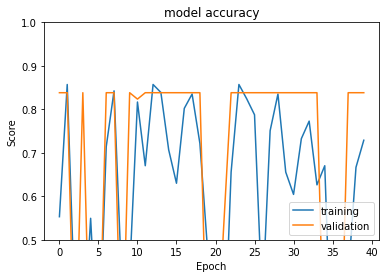

In [15]:
# summarize history for accuracy
plt.plot(Alexhist.history['accuracy'], label='training')
plt.plot(Alexhist.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

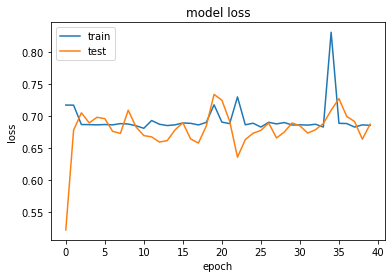

In [16]:
# summarize history for loss
plt.plot(Alexhist.history['loss'],label='training')
plt.plot(Alexhist.history['val_loss'], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
Alexmodel.evaluate(X_Test, Y_Test)

3/3 [==============================] - 0s 31ms/step - loss: 0.6877 - accuracy: 0.8382 - precision: 0.0000e+00 - recall_1: 0.0000e+00


[0.6876846551895142, 0.8382353186607361, 0.0, 0.0]

## CLDNN

In [18]:
cldnn = models.Sequential()
cldnn.add(layers.TimeDistributed(layers.Conv2D(32, (3, 3),padding='same',strides=(2,2), activation='relu'),input_shape=(1,256, 256, 3)))
cldnn.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
cldnn.add(layers.TimeDistributed(layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu')))
cldnn.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
cldnn.add(layers.TimeDistributed(layers.Conv2D(16, (3, 3),strides=(2,2), activation='relu')))
cldnn.add(layers.TimeDistributed(layers.Flatten()))
cldnn.add(layers.LSTM(1024, activation='relu', return_sequences=False))
cldnn.add(layers.Dense(1024, activation='relu'))
cldnn.add(layers.Dropout(.5))
cldnn.add(layers.Dense(1024, activation='relu'))
cldnn.add(layers.Dropout(.5))
cldnn.add(layers.Dense(1, activation='sigmoid'))

In [19]:
%%time
cldnn.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy','Precision',tf.keras.metrics.Recall()])

Wall time: 0 ns


In [20]:
%%time
cldnnhist = cldnn.fit(cl_X_Train, Y_Train, epochs=40,class_weight=class_weight, batch_size=20,validation_data=(cl_X_Test, Y_Test))

Epoch 1/40
14/14 [==============================] - 4s 180ms/step - loss: 0.7006 - accuracy: 0.5385 - precision: 0.1009 - recall_2: 0.2821 - val_loss: 0.6840 - val_accuracy: 0.8382 - val_precision: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/40
14/14 [==============================] - 2s 154ms/step - loss: 0.6847 - accuracy: 0.8462 - precision: 0.2000 - recall_2: 0.0256 - val_loss: 0.6372 - val_accuracy: 0.8382 - val_precision: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/40
14/14 [==============================] - 2s 155ms/step - loss: 0.6831 - accuracy: 0.8132 - precision: 0.0714 - recall_2: 0.0256 - val_loss: 0.6610 - val_accuracy: 0.8382 - val_precision: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/40
14/14 [==============================] - 2s 155ms/step - loss: 0.6692 - accuracy: 0.7473 - precision: 0.2321 - recall_2: 0.3333 - val_loss: 0.7123 - val_accuracy: 0.3088 - val_precision: 0.1786 - val_recall_2: 0.9091
Epoch 5/40
14/14 [==============================] - 2s 155ms/ste

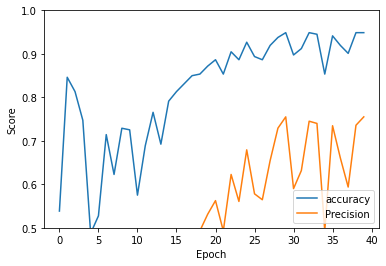

In [21]:
# summarize history for accuracy
plt.plot(cldnnhist.history['accuracy'], label='accuracy')
plt.plot(cldnnhist.history['precision'], label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

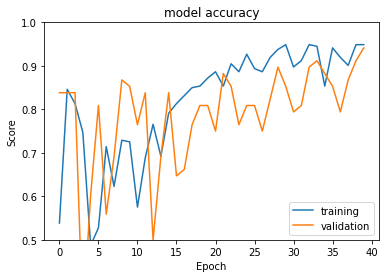

In [22]:
# summarize history for accuracy
plt.plot(cldnnhist.history['accuracy'], label='training')
plt.plot(cldnnhist.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

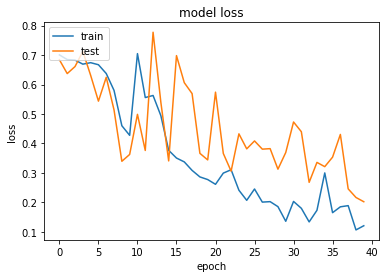

In [23]:
# summarize history for loss
plt.plot(cldnnhist.history['loss'],label='training')
plt.plot(cldnnhist.history['val_loss'], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
cldnn.evaluate(cl_X_Test, Y_Test)

3/3 [==============================] - 0s 23ms/step - loss: 0.2020 - accuracy: 0.9412 - precision: 0.8889 - recall_2: 0.7273


[0.20204736292362213,
 0.9411764740943909,
 0.8888888955116272,
 0.7272727489471436]

## AUC ROC

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [26]:
y_pred_Le = (Le5model.predict(X_Test)>0.5).astype("int32")
l5fpr_keras, l5tpr_keras, l5thresholds_keras = roc_curve(Y_Test, y_pred_Le)
l5auc_keras = auc(l5fpr_keras, l5tpr_keras)

y_pred_Ax = (Alexmodel.predict(X_Test)>0.5).astype("int32")
Axfpr_keras, Axtpr_keras, Axthresholds_keras = roc_curve(Y_Test, y_pred_Ax)
Axauc_keras = auc(Axfpr_keras, Axtpr_keras)

y_pred_cldnn = (cldnn.predict(cl_X_Test)>0.5).astype("int32")
cdfpr_keras, cdtpr_keras, cdthresholds_keras = roc_curve(Y_Test, y_pred_cldnn)
cdauc_keras = auc(cdfpr_keras, cdtpr_keras)

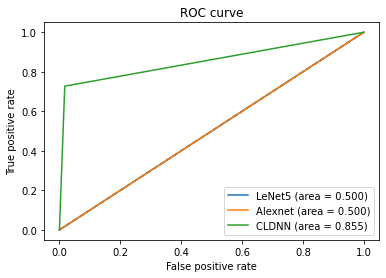

In [27]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(l5fpr_keras, l5tpr_keras, label='LeNet5 (area = {:.3f})'.format(l5auc_keras))
plt.plot(Axfpr_keras, Axtpr_keras, label='Alexnet (area = {:.3f})'.format(Axauc_keras))
plt.plot(cdfpr_keras, cdtpr_keras, label='CLDNN (area = {:.3f})'.format(cdauc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()